### MidTerm Assignment: notebook 2: Backpropagation (Total 25pts)


<p><font color='red'><b>Given date : March 30</b></font></p>

<font color='red'><b>Due date : April 17</b></font>


<img src="backpropImage1.jpg",width=400> 

### Question 1. Training the network through backpropagation (Total 22pts)

In this exercise, you will get to apply what you learned on backpropagation. 
We are interested in learning a classifier for the dataset below. This dataset is similar to what we did in class in the on hidden layer case. The difference is that you now have to learn a neural network with __multiple hidden layers__. We want to train the network through a minimization of the binary cross entropy. We further want to consider an $\ell_2$-regularizarion term on all the weights except the bias, of each neurons. 

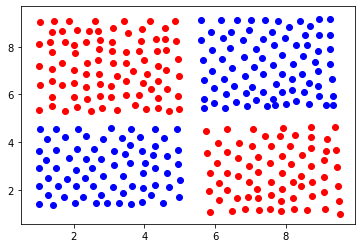

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.io as sio
data_class1 = sio.loadmat('./Notebook1_Ex1_Class1.mat')
data_class2 = sio.loadmat('./Notebook1_Ex1_Class2.mat')

data_class1 = data_class1['Notebook1_Ex1_Class1']
data_class2 = data_class2['Notebook1_Ex1_Class2']

plt.scatter(data_class1[:,0], data_class1[:,1], c = 'r')
plt.scatter(data_class2[:,0], data_class2[:,1], c='b')
plt.show()


#### Question 1.1. (3pts) Start by coding the sigmoid activation function and its derivative

In [2]:

# ================================================================================================
# Step I : Activation 
# ================================================================================================


def sigmoid(X):
    
    '''As in the one hidden layer case, start by defining a function that given a dataset 
    X return the value sigma(x) = 1/(1+e^{-x}) as well as the gradient of this function'''
    
    f = 1/(1 + np.exp(-X))
    g = f * (1 - f) 
    
    return f, g



#### Question 1.2. (6pts) Code the forward propagation of an input $X$ through a network with weights $W$

In [3]:

# ================================================================================================
# Step II : Forward Propagation
# ================================================================================================

def predict(y_prob):
    return np.array([np.round(x) for x in y_prob])

def Forward_prop(X, w, network_size):
    
    '''Then we want to write the function that takes as input the dataset X 
    and the vector of targets t and returns the output to a network of size encoded 
    in network_size. Here network_size is a n_layer tuple in which each entry encode 
    the number of units in the layer. The output should be computed for the weight vector w'''
    
    X = np.hstack((X,np.ones((X.shape[0],1)))) #bias
    net_output = (X.T @ np.diag(w))
    y_prob, grad = sigmoid(net_output.T)
    y_prob = np.mean(y_prob, axis = 1)
    
    return y_prob




#### Question 1.3. (9pts) code the log-loss and its derivative through backpropagation

In [4]:

# ================================================================================================
# Step III : Binary cross entropy and backpropagation
# ================================================================================================

def Logloss(w, X, t, network_size):
    
    '''This function should return the value of the log loss as well as the gradient of that loss
    gradient computation should rely on backpropagation.'''
    
    
    
    '''Start by forward propagating the inputs through the network'''
    
    y_pred = Forward_prop(X, w, network_size)
    loss = -((t + 1) * np.log(y_pred) + (1 - t) * np.log(1 - y_pred))
    
    '''While you forward propagate, '''
    f, g = sigmoid(t)
    
    
    loss_grad = g * loss * 0.001
    
    return np.mean(loss), loss_grad




#### Question 1.4. (4pts) Train your network using the minimize module from scipy. 

This modules requires you to specify the function Logloss wihch you coded above. The 'jac=True'parameter simply indicates that your function 'Logloss' should return both the loss that you want to minimize and the gradient of that loss. Minimize then apply gradient descent or a related optimization routine to this function.    

In [5]:

# ================================================================================================
# Step IV : Learning 
# ================================================================================================

from scipy.optimize import minimize

# Initialize your vector of weights with random gaussian weights 


data = np.vstack((data_class1, data_class2))
np.random.shuffle(data)
network_size = data.shape[0]
Y = np.vstack((np.zeros(len(data_class1) - 1), np.ones(len(data_class1) - 1))).reshape(network_size)
w0 = np.random.rand(network_size)

# Then use the minimize module from scipy to train your network 

maxIter = 500 # replace with your max number of iterations
options = {'maxiter': maxIter, 'disp': True}

out = minimize(Logloss, w0, jac=True, method='TNC', args= (data, Y, network_size), options=options)

Opti_weights = out.x
    

### Question 2. (3pts) Once your network has been trained, use meshgrid to display the classification boundary below

In [6]:
import numpy as np
import matplotlib.pyplot as plt


data = np.vstack((data_class1, data_class2))
xmin = np.amin(data[:,0])
xmax = np.amax(data[:,0])
ymin = np.amin(data[:,1])
ymax = np.amax(data[:,1])


xequispaced = np.linspace(xmin, xmax, 100)
yequispaced = np.linspace(ymin, ymax, 100)

xx, yy = np.meshgrid(xequispaced, yequispaced)

grid_data = np.vstack((xx.flatten(), yy.flatten())).T

X = data

label_mesh = predict(Forward_prop(X, Opti_weights, network_size)) # use your forwardProp implementation


In [7]:
label_mesh

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

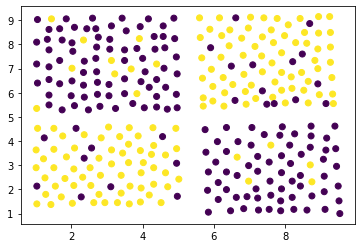

In [8]:
plt.scatter(X[:,0], X[:,1], c = label_mesh)
plt.show()